# Wrangle and Analyze Data Udacity Project
#### By Mohammad Albloushi

### Introduction

In this project im going to perform data wrangling in three diffrent datasets, each dataset gathered in a diffrent way and then merging these datasets into one cleaned and wrangled dataset, The dataset that i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import tweepy
import json
import time

## Gathering Data

### Twitter Archive
i Downloaded twitter-archive-enhanced.csv manually and imported it into the jupyter notebook

In [14]:
# loading the df
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
# Having a look at the df
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions 

I Programmatically downloaded image-predictions.tsv using requests and imported it.

In [4]:
# Download link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Writing the data into a tsv
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [15]:
# loading the df
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')
# Having a look at the df
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API

In [4]:
# Twitter api coding
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True) #Notify when waiting on rate limit

In [8]:
# list to store column data
data_list = []
# list for error from id's
error_list = []
#count down the start of the time
start = time.time()
# creating a for loop to store column data
for tweet_id in df_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')._json 
        retweets = tweet['retweet_count']
        favorites = tweet['favorite_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        
        data_list.append({'tweet_id': int(tweet_id),
                        'retweets' : int(retweets),
                        'favorites': int(favorites),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print('Error with id = ' + str(tweet_id) + ' -- ' + str(e)) #print out error's with id numbers
        error_list.append(tweet_id)
# count when the for loop end
end = time.time()
# print out how many seconds the loop took
print(end - start)

Error with id = 888202515573088257 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 282
Error with id = 873697596434513921 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 872668790621863937 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 869988702071779329 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 866816280283807744 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 861769973181624320 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 845459076796616705 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 842892208864923648 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 837012587749474308 -- [{'code': 144, 'message': 'No status found with that ID.'}]
Error with id = 827228250799742977 -- [{'code': 144, 'message': 'No status found

##### Observation

- There is error retriving data in 14 id's
- The time it took to write the data is 2202 Seconds (~36 minutes)

In [9]:
# making a dataframe from the data we got
df_tweets = pd.DataFrame(data_list, columns = ['tweet_id', 'retweets', 'favorites',
                                              'user_followers', 'user_favourites', 'date_time'])
# saving it to tweet_json.txt
df_tweets.to_csv('tweet_json.txt', encoding='utf-8', index=False)

In [16]:
# reading tweet_json.txt
df_twitter = pd.read_csv('tweet_json.txt', encoding='utf-8')
# Having a look at the data
df_twitter.head()

,tweet_id,retweets,favorites,user_followers,user_favourites,date_time
0,892420643555336193,8389,38266,7433310,139181,2017-08-01 16:23:56
1,892177421306343426,6192,32798,7433310,139181,2017-08-01 00:17:27
2,891815181378084864,4098,24701,7433310,139181,2017-07-31 00:18:03
3,891689557279858688,8517,41597,7433939,139183,2017-07-30 15:58:51
4,891327558926688256,9238,39779,7433939,139183,2017-07-29 16:00:24


## Assessing the Data


In [17]:
# Setting up pandas options so i can observe more problems
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [18]:
# Visually looking at the data
df_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
# Programmatically looking at the data
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_archive['rating_numerator'].value_counts()
df_archive['name'].value_counts()
df_archive['rating_denominator'].value_counts()
sum(df_archive['retweeted_status_user_id'].value_counts())
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
# Visually looking at the data
df_image.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
# Programmatically looking at the data
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df_image['p1'].value_counts()
df_image['jpg_url'].duplicated().sum()

66

In [26]:
# Visually looking at the data
df_twitter.head(20)

,tweet_id,retweets,favorites,user_followers,user_favourites,date_time
0,892420643555336193,8389,38266,7433310,139181,2017-08-01 16:23:56
1,892177421306343426,6192,32798,7433310,139181,2017-08-01 00:17:27
2,891815181378084864,4098,24701,7433310,139181,2017-07-31 00:18:03
3,891689557279858688,8517,41597,7433939,139183,2017-07-30 15:58:51
4,891327558926688256,9238,39779,7433939,139183,2017-07-29 16:00:24
5,891087950875897856,3072,19960,7433310,139181,2017-07-29 00:08:17
6,890971913173991426,2039,11685,7433939,139183,2017-07-28 16:27:12
7,890729181411237888,18621,64602,7433939,139183,2017-07-28 00:22:40
8,890609185150312448,4213,27437,7433939,139183,2017-07-27 16:25:51
9,890240255349198849,7284,31489,7433310,139181,2017-07-26 15:59:51


In [27]:
# Programmatically looking at the data
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
retweets           2342 non-null int64
favorites          2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
date_time          2342 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


In [28]:
df_twitter.describe()

,tweet_id,retweets,favorites,user_followers,user_favourites
count,2.342000e+03,2342.000000,2342.000000,2.342000e+03,2342.000000
mean,7.422212e+17,2956.576003,8008.672929,7.433596e+06,139181.387276
std,6.832408e+16,4965.670424,12372.524050,2.856625e+02,1.141756
min,6.660209e+17,0.000000,0.000000,7.433310e+06,139179.000000
25%,6.783509e+17,594.250000,1387.000000,7.433370e+06,139181.000000
50%,7.186224e+17,1380.000000,3488.500000,7.433401e+06,139181.000000
75%,7.986971e+17,3448.750000,9822.250000,7.433958e+06,139183.000000
max,8.924206e+17,84287.000000,165078.000000,7.433966e+06,139183.000000


In [29]:
df_twitter['user_favourites'].value_counts()

139181    1330
139183     679
139180     215
139179     118
Name: user_favourites, dtype: int64

## Tidiness

- We can merge these three datasets (df_archive, df_image, df_twitter) together using tweet_id
- Dog stages split into 4 columns(doggo, floofer, pupper, puppo)
- Unnecesery columns we can remove(like date_time we already have a date column and user_favourites which only have 2 values).

## Quality:

- We don't want retweets.
- tweets without pictures.
- Wrong data type in timestamp.
- p1 containing capital and small letter and unnecesery "_" inbetween.
- Wrong names in names columns like : 'None', 'a', 'an', the.
- rating_numerator and rating_denominator should be floats and not integers.
- There's only 4 sources where tweets come from so we can simplify the column to only where it's coming from.
- Bad column names
- Fixing remaining datatypes

## Cleaning the data

In [30]:
# Making Copies of data frames

tweet_data_clean = df_twitter.copy()
twitter_archive_clean = df_archive.copy()
image_predictions_clean= df_image.copy()

##### Define

Since we can merge the dataset together using tweet_id i'm going to Add tweet_data_clean, image_predictions_clean and twitter_archive_clean together to make cleaning easier and smoother.

##### Code

In [31]:
# Merging twitter_archive_clean with image_predictions_clean using a left inner
df_all_clean = pd.merge(left = twitter_archive_clean, right = image_predictions_clean,
                       left_on = 'tweet_id', right_on = 'tweet_id', how = 'left') # Merging df on tweet_id

In [32]:
# Merging df_all_clean with tweet_data_clean using a left inner
df_all_clean = pd.merge(left = df_all_clean, right = tweet_data_clean,
                       left_on = 'tweet_id', right_on = 'tweet_id', how = 'left') # merging df on tweet_id

In [33]:
df_all_clean.info() # Having a look at the df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

##### Define

Dog stage split into 4 columns when it can only be one, going to extract dog stages from text and put it in stage column and then remove the 4 columns.

##### Code

In [34]:
# Creating a stage column and extracting dog stage
df_all_clean['stage'] = df_all_clean['text'].str.extract('(doggo|floofer|pupper|puppo)',
                                                           expand=True)

In [35]:
# Dropping 4 dog stage columns
df_all_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],
                  axis=1, inplace=True)

##### Test

In [36]:
df_all_clean['stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stage, dtype: int64

##### Define

Remove rows that are retweets and remove columns related to retweets.

##### Code

In [37]:
# removing retweets from retweeted_status_user_id columns
df_all_clean = df_all_clean[pd.isnull(df_all_clean['retweeted_status_user_id'])]

In [38]:
# Removing columns related to retweets
df_all_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                  axis=1, inplace=True)

##### Test

In [39]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf              

##### Define

Removing all tweets that does not include pictures

##### Code

In [40]:
# Removing values in jpg_url
df_all_clean = df_all_clean[pd.notnull(df_all_clean['jpg_url'])]

##### Test

In [41]:
# Checking the len to confirm removal
len(df_all_clean)

1994

##### Define

Removing unnecesery columns in the dataset that i won't use

##### Code

In [42]:
# listing the columns and removing them
df_all_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'p2', 'p2_conf', 'p2_dog',
                  'p3', 'p3_conf', 'p3_dog', 'date_time', 'user_favourites'],
                  axis=1, inplace=True)

In [43]:
# checking to confirm
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
retweets              1993 non-null float64
favorites             1993 non-null float64
user_followers        1993 non-null float64
stage                 326 non-null object
dtypes: float64(5), int64(3), object(9)
memory usage: 280.4+ KB


##### Define

Fixing the inconsistent typing in p1 typing that contain capital and small letter and removing '_' inbetwee two words

##### Code

In [44]:
# Removing '_'
df_all_clean['p1'] = df_all_clean['p1'].str.replace('_', ' ')
# Capitalizing the first letter
df_all_clean['p1'] = df_all_clean['p1'].str.title()

In [45]:
# Checking for the changes
df_all_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,retweets,favorites,user_followers,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,8389.0,38266.0,7433310.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,6192.0,32798.0,7433310.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,4098.0,24701.0,7433310.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,8517.0,41597.0,7433939.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,9238.0,39779.0,7433939.0,NaN


##### Define

Converting timestamp to date time datatype

##### Code

In [46]:
# converting using pandas
df_all_clean['timestamp'] = pd.to_datetime(df_all_clean['timestamp'])

In [47]:
# Confirming the change
df_all_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
retweets                     float64
favorites                    float64
user_followers               float64
stage                         object
dtype: object

In [48]:
df_all_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,retweets,favorites,user_followers,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,8389.0,38266.0,7433310.0,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,6192.0,32798.0,7433310.0,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,4098.0,24701.0,7433310.0,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,8517.0,41597.0,7433939.0,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,9238.0,39779.0,7433939.0,NaN


##### Define

Replace wrong names and None to null values 

##### Code

In [49]:
# Listing some wrong names
wrong_names = ['None', 'a', 'an', 'the', 'my', 'by', 'getting', 'one', 'just', 'quite',]
# A For loop replacinn wrong names with null values
for i in wrong_names:
    df_all_clean['name'] = df_all_clean['name'].replace(i, np.NaN)

##### Test

In [50]:
# Having a look to confirm there is no wrong names
df_all_clean.name.value_counts()

Charlie           11
Oliver            10
Cooper            10
Lucy              10
Tucker             9
Penny              9
Sadie              8
Winston            8
Toby               7
Daisy              7
Lola               7
Bella              6
Koda               6
Stanley            6
Jax                6
Bo                 6
Bailey             5
Louis              5
Scout              5
Milo               5
Chester            5
Dave               5
Oscar              5
Rusty              5
Buddy              5
Leo                5
very               4
Gus                4
Winnie             4
Reggie             4
Duke               4
Scooter            4
George             4
Chip               4
Brody              4
Larry              4
Phil               4
Gary               4
Dexter             4
Clarence           4
Archie             4
Jerry              4
Finn               4
Bear               4
Maggie             4
Oakley             4
Clark              4
Alfie        

##### Define

Change rating_numerator	and rating_denominator data types to floats.

##### Code

In [51]:
# Changing rating_numerator to a float
df_all_clean['rating_numerator'] = df_all_clean['rating_numerator'].astype(float)
# Changing rating_denominator to a float
df_all_clean['rating_denominator'] = df_all_clean['rating_denominator'].astype(float)

##### Test

In [52]:
# Confirming the change
df_all_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
retweets                     float64
favorites                    float64
user_followers               float64
stage                         object
dtype: object

##### Define

Replacing the source with a simplified words instead of the whole link and then change it to the right datatype.

##### Code

In [53]:
# Checking the source value_counts
df_all_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

I noticed here that there was tweets from Vine but after i removed tweets without picture or retweets there is no more tweets from Vine.

In [54]:
# Making a list from source column
source_replace = df_all_clean['source'].unique().tolist()
# The simplified word to replace the whole source
word_replace = ['From iPhone', 'From Twitter', 'From Tweetdeck']
# a For loop that replace the words with the web source
for i in df_all_clean['source']:
    df_all_clean['source'] = df_all_clean['source'].replace(source_replace, word_replace)

##### Test

In [55]:
# Checking to confirm the change
df_all_clean['source'].value_counts()

From iPhone       1955
From Twitter        28
From Tweetdeck      11
Name: source, dtype: int64

##### Define

Renaming columns to more appropriate names.

##### Code

In [56]:
# renaming columns
df_all_clean.rename(columns={'p1' : 'prediction_1',
                            'p1_conf' : 'confidence',
                            'p1_dog' : 'dog_or_not'}, inplace=True)

##### Test

In [57]:
# Having a look
df_all_clean.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,prediction_1,confidence,dog_or_not,retweets,favorites,user_followers,stage


##### Define

Fixing datatypes in columns

##### Code

In [58]:
# Having a look before changing
df_all_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
jpg_url                       object
img_num                      float64
prediction_1                  object
confidence                   float64
dog_or_not                    object
retweets                     float64
favorites                    float64
user_followers               float64
stage                         object
dtype: object

In [59]:
# Changing tweet id to a str since we don't need to perform anything on it
df_all_clean['tweet_id'] = df_all_clean['tweet_id'].astype(str)
# Changing source to a categorical datatype
df_all_clean['source'] = df_all_clean['source'].astype('category')
# Changing stage to a categorical datatype
df_all_clean['stage'] = df_all_clean['stage'].astype('category')

##### Test

In [60]:
# Confirming the change
df_all_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
jpg_url                       object
img_num                      float64
prediction_1                  object
confidence                   float64
dog_or_not                    object
retweets                     float64
favorites                    float64
user_followers               float64
stage                       category
dtype: object

## Storing cleaned Data to csv dateframe

In [61]:
# Storing Wrangled data to a csv
df_all_clean.to_csv('twitter_archive_master.csv',
                   encoding='utf-8', index=False)

In [62]:
# Reading data
df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,prediction_1,confidence,dog_or_not,retweets,favorites,user_followers,stage
0,892420643555336193,2017-08-01 16:23:56,From iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,8389.0,38266.0,7433310.0,NaN
1,892177421306343426,2017-08-01 00:17:27,From iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,6192.0,32798.0,7433310.0,NaN


## Analyzing and Visualizing Data

In [63]:
# Converting some datatypes
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['source'] = df_clean['source'].astype('category')
df_clean['stage'] = df_clean['stage'].astype('category')
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
# Setting a background style
sns.set_style('darkgrid')

Before we start analyzing let's have a look at a correlation matrix and see the strongest correlation in our dataset.

In [64]:
corr = df_clean.corr()
corr.style.background_gradient().set_precision(2)

,rating_numerator,rating_denominator,img_num,confidence,dog_or_not,retweets,favorites,user_followers
rating_numerator,1,0.2,-0.00068,-0.009,-0.029,0.018,0.016,-0.0024
rating_denominator,0.2,1,-0.0041,-0.0042,0.00064,-0.02,-0.027,0.002
img_num,-0.00068,-0.0041,1,0.2,0.033,0.1,0.13,0.13
confidence,-0.009,-0.0042,0.2,1,0.13,0.051,0.075,0.079
dog_or_not,-0.029,0.00064,0.033,0.13,1,0.0043,0.045,0.046
retweets,0.018,-0.02,0.1,0.051,0.0043,1,0.93,0.17
favorites,0.016,-0.027,0.13,0.075,0.045,0.93,1,0.25
user_followers,-0.0024,0.002,0.13,0.079,0.046,0.17,0.25,1


By the look in this table Retweets and Favorites have a really strong correlation by 0.93 let's create a plot about these columns

### Favorites vs Retweets

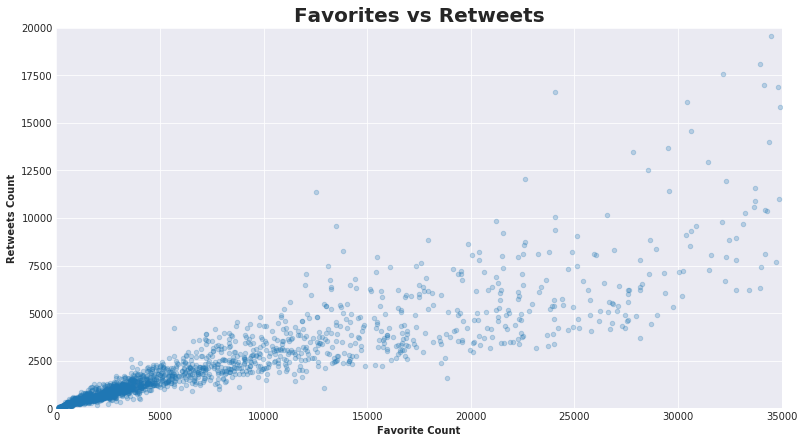

In [65]:
# Plotting and limiting the x,y to observe more
df_clean.plot(x='favorites', y='retweets',
             kind='scatter', alpha=1/4,
             ylim=[0,20000], xlim=[0,35000], figsize=(13,7), )
plt.title('Favorites vs Retweets', fontsize=20, weight='bold')
plt.xlabel('Favorite Count', size=10, weight='bold')
plt.ylabel('Retweets Count', size=10, weight='bold');

With this simple plot we can observe a few things.

- There's a strong positive correlation
- Most of tweets have retweets between 2000 and 2500
- Most of tweets have favorites less than 15000
- As Retweets increase the favorites increase as well

### Date vs Rating

Let's have a look at how ratings overtime have been going

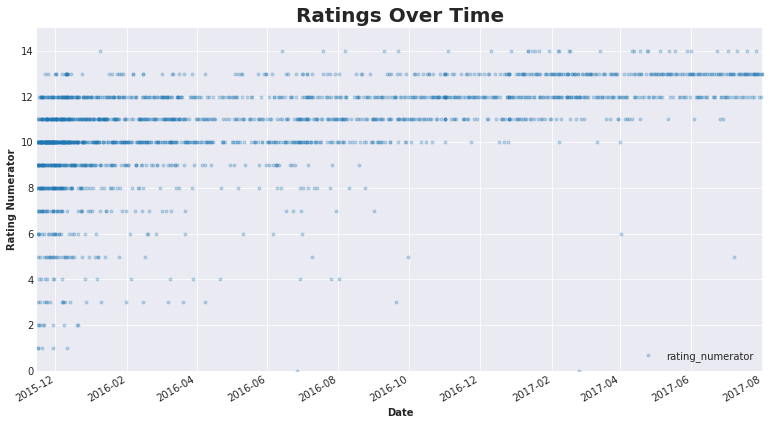

In [66]:
# Plotting and limiting the ratings to not include outliers
df_clean.plot(x='timestamp', y ='rating_numerator',
              style = '.', alpha = 1/4,
              ylim=[0,15], figsize=(13,7))
plt.title('Ratings Over Time', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=10, weight='bold')
plt.ylabel('Rating Numerator', fontsize=10, weight='bold');

In [67]:
# Looking at discreptive statistics
df_clean['rating_numerator'].describe()

count    1994.000000
mean       12.280843
std        41.497718
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Through this plot we can observe

- Good ratings been occuring more overtime and it's been increasing
- in 2015~2016 we can see a lot of bad ratings but in late 2016 and 2017 we almost can't see bad ratings
- The most common rating is 12
- The median in our data is 11 and the mean is 12.28, also 50% of our data has a rating from 10 to 12 (IQR)

### Date vs Retweets and Favorites
Let's see how retweets and favorites been going through time

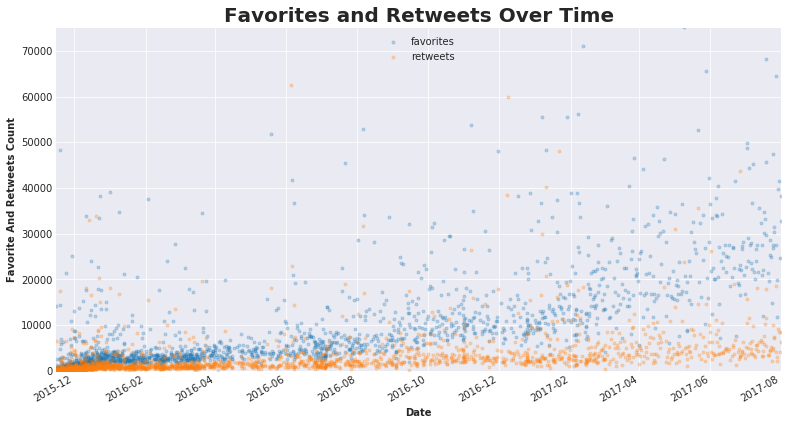

In [68]:
# plotting and limiting favorites and retweets to observe
df_clean.plot(x='timestamp', y=['favorites', 'retweets'],
             style='.', alpha=1/4,
             ylim=[0,75000], figsize=(13,7))
plt.title('Favorites and Retweets Over Time', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=10, weight='bold')
plt.ylabel('Favorite And Retweets Count', fontsize=10, weight='bold');

From this plot we can observe 

- there's seems a positive relationship between date and favorite as date increase the amount of favorites increase
- there's doesn't seem to a lot of increasing or decreasing in retweet and there is almost the same amount retweets
- We can see that there is more tweets with retweets and favorites in late 2015 and 2016 but after that there seems to be less tweets

### Dog Type vs Retweet, Favorites and rating

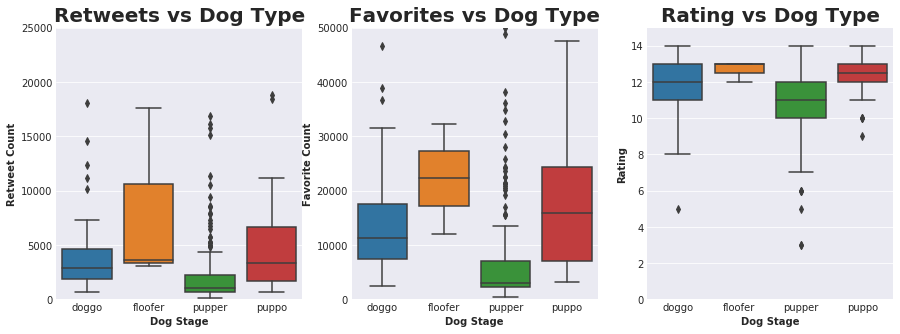

In [69]:
# Subplotting three boxplots together
plt.subplots(figsize=(15,5))
plt.subplot(131)
sns.boxplot(x='stage', y='retweets', data=df_clean)
axes = plt.gca()
axes.set_ylim([0,25000]) # limmiting the y axes
plt.title('Retweets vs Dog Type', fontsize=20, weight='bold')
plt.xlabel('Dog Stage', size=10, weight='bold')
plt.ylabel('Retweet Count', size=10, weight='bold');

plt.subplot(132)
sns.boxplot(x='stage', y='favorites', data=df_clean)
axes = plt.gca()
axes.set_ylim([0,50000]) # limiting the y axes
plt.title('Favorites vs Dog Type', fontsize=20, weight='bold',)
plt.xlabel('Dog Stage', size=10, weight='bold')
plt.ylabel('Favorite Count', size=10, weight='bold');

plt.subplot(133)
sns.boxplot(x='stage', y='rating_numerator', data=df_clean)
axes = plt.gca()
axes.set_ylim([0,15]) # Limiting the ratings
plt.title('Rating vs Dog Type', fontsize=20, weight='bold')
plt.xlabel('Dog Stage', size=10, weight='bold')
plt.ylabel('Rating', size=10, weight='bold');

In [70]:
# Discreptive statistics about Retweets and dog stages
df_clean.groupby('stage')['retweets'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,72.0,5957.250000,12323.166829,688.0,1869.75,2846.0,4630.25,84287.0
floofer,3.0,8096.333333,8193.150452,3103.0,3368.50,3634.0,10593.00,17552.0
pupper,223.0,2206.251121,3518.012996,87.0,654.00,1083.0,2246.50,35709.0
puppo,28.0,6583.285714,9439.276302,673.0,1672.75,3303.0,6693.00,48097.0


In [71]:
# Discreptive statistics about Favorites and dog stages
df_clean.groupby('stage')['favorites'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,72.0,17523.819444,24331.070096,2485.0,7408.25,11198.0,17618.75,165078.0
floofer,3.0,22155.666667,10068.152280,12022.0,17155.00,22288.0,27222.50,32157.0
pupper,223.0,6902.255605,11246.618296,332.0,2251.00,3078.0,7126.00,122639.0
puppo,28.0,22831.535714,27177.634924,3147.0,7033.00,15938.0,24330.50,141254.0


In [72]:
# # Discreptive statistics about ratings and dog stages
df_clean.groupby('stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,72.0,14.305556,22.729666,5.0,11.0,12.0,13.0,204.0
floofer,3.0,12.666667,0.577350,12.0,12.5,13.0,13.0,13.0
pupper,223.0,12.995516,15.076232,3.0,10.0,11.0,12.0,143.0
puppo,28.0,12.142857,1.208436,9.0,12.0,12.5,13.0,14.0


##### Retweets vs dog type

- Doggo stage has the most retweets ever and the least retweets is pupper
- The biggest median retweet is with floofer dog types with 3634 retweets and the least is with puppers with 1082 retweets
- The largest range is also with floofers
- The least range median and range is with pupper and it has a lot of outliers

##### Favorites vs Dog Type

- Doggo as well has the most favorites ever and the least floofer
- Puppo has the largest range ranging 
- The biggest median favorites is with floofers with 22294 favorites and the least with pupper with 3080 favorites
- The smallest range is with puppers

##### Rating vs Dog Type

- Pupper dogs is getting the least ratings between all dog types
- Floofer is getting the highest ratings between all dog types
- 75% of our data have a rating of 13 except pupper they have a rating of 12

### top 10 Most predicted with highest confedince

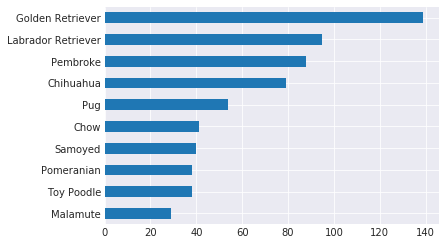

In [73]:
# simple plot about the most predicted breed
df_clean['prediction_1'].value_counts()[9::-1].plot(kind='barh');

In [74]:
df_clean['prediction_1'].value_counts()[9::-1]

Malamute               29
Toy Poodle             38
Pomeranian             38
Samoyed                40
Chow                   41
Pug                    54
Chihuahua              79
Pembroke               88
Labrador Retriever     95
Golden Retriever      139
Name: prediction_1, dtype: int64

We can observe that

- Golden Retriever is the most predicted dog followed up by Labrador Retriever
- There a 44 gap between the most predicted breed and the second predicted breed

### The most popular name

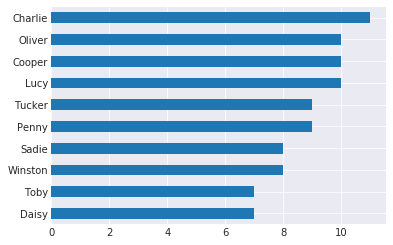

In [75]:
# simple plot about the most common names
df_clean['name'].value_counts()[9::-1].plot(kind='barh');

In [76]:
# value counts for names
df_clean['name'].value_counts()[9::-1]

Daisy       7
Toby        7
Winston     8
Sadie       8
Penny       9
Tucker      9
Lucy       10
Cooper     10
Oliver     10
Charlie    11
Name: name, dtype: int64

We can observe that

- The most used name is Charlie
- Names scores are pretty close

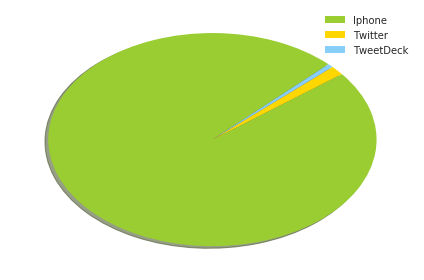

In [77]:
# Assigning source value count to a variable
df_clean_source = df_clean['source'].value_counts()

# plotting a pie chart
labels = ['Iphone', 'Twitter', 'TweetDeck']
colors = ['yellowgreen', 'gold', 'lightskyblue']
sources, ax1 = plt.pie(df_clean_source, colors=colors, shadow=True, startangle=45)
plt.legend(sources, labels, loc="best")
plt.tight_layout()
plt.show()

In [78]:
# value counts about sources
df_clean['source'].value_counts()

From iPhone       1955
From Twitter        28
From Tweetdeck      11
Name: source, dtype: int64

We can observe that

- Almost all tweets come from an iPhone
- only 39 Tweets came from other sources